In [1]:
library(ggplot2)
library(dplyr)
library(LDlinkR)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
############### old results (Cuomo*, Seaton*, McCarthy* et al Nat Comm 2020)

In [3]:
# load lead variant results sc stages (iPS, mesendo, defendo)
leads.ips = read.csv("/nfs/leia/research/stegle/acuomo/mean/day0/all_expts/leads.csv", row.names = 1)
leads.mes = read.csv("/nfs/leia/research/stegle/acuomo/mean/mesendo_est_June20/leads.csv", row.names = 1)
leads.defendo = read.csv("/nfs/leia/research/stegle/acuomo/mean/defendo_est_June20/leads.csv", row.names = 1)

In [4]:
# add differentiation stage information
leads.ips$stage = "ips"
leads.mes$stage = "mesendo"
leads.defendo$stage = "defendo"

In [5]:
# merge results
endo_eqtl = rbind(leads.ips, 
                 leads.mes,
                 leads.defendo)

In [6]:
# pick top SNP across stages (min p_value)

In [7]:
# order by p_value
endo_eqtl = endo_eqtl[order(endo_eqtl$p_value),]
nrow(endo_eqtl)
head(endo_eqtl,2)

[1] 32665

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage
6,-1.457854,0.1020245,9.536615e-26,2.553619e-46,4_39446549_G_A,ENSG00000163682_RPL9,1.260613e-22,4,39446549,G,...,0.02499141,0.6516389,0.4681722,0.3833344,0.05690061,0.02657527,0.2945979,0.02514148,0.7088325,ips
12,1.801311,0.1333499,3.391301e-21,1.399851e-41,7_55806087_G_T,ENSG00000226278_PSPHP1,2.241423e-18,7,55806087,G,...,0.10854778,0.0611202,0.3728356,0.2267340,0.60751447,0.24224812,0.6809891,0.47102673,0.2149549,ips


In [8]:
# select only one SNP per gene 
endo_eqtl = endo_eqtl[-which(duplicated(endo_eqtl$feature)),]
nrow(endo_eqtl)

[1] 10788

In [9]:
T = 0.1
## consider significant hits only (FDR<10%)
endo_eqtl = endo_eqtl[endo_eqtl$global_corr_p_value <= T,]

In [10]:
nrow(endo_eqtl)

[1] 3079

In [11]:
endo_eqtl$feature_id = gsub("_.*","",endo_eqtl$feature)

In [12]:
# CellRegMap association test

In [13]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [14]:
crm_file = paste0(revision_folder, "CRM_association/summary.csv")
crm = read.csv(crm_file, row.names=1)
colnames(crm) = c("feature_id", "n_snps", "feature_chromosome","p_value","snp_id","p_value_Bonferroni") 
nrow(crm)
head(crm,2)

[1] 10003258

,feature_id,n_snps,feature_chromosome,p_value,snp_id,p_value_Bonferroni
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [15]:
length(unique(crm$feature_id))

[1] 10493

In [16]:
top_crm = crm[order(crm$p_value),]
top_crm = top_crm[-which(duplicated(top_crm$feature_id)),]

In [17]:
res = top_crm

In [18]:
cols = c("feature_id","snp_id")
df = inner_join(endo_eqtl[,c("stage",cols)], res[,cols], by = c("feature_id"), suffix=c(".old",".new"))

In [19]:
nrow(endo_eqtl)
head(endo_eqtl)

[1] 3079

,beta,beta_se,empirical_feature_p_value,p_value,snp_id,feature,global_corr_p_value,chrom,pos,ref_allele,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,stage,feature_id
6,-1.457854,0.10202454,9.536615e-26,2.553619e-46,4_39446549_G_A,ENSG00000163682_RPL9,1.260613e-22,4,39446549,G,...,0.65163891,0.46817225,0.3833344,0.05690061,0.026575272,0.29459793,0.02514148,0.70883248,ips,ENSG00000163682
12,1.801311,0.13334992,3.391301e-21,1.399851e-41,7_55806087_G_T,ENSG00000226278_PSPHP1,2.241423e-18,7,55806087,G,...,0.06112020,0.37283558,0.2267340,0.60751447,0.242248119,0.68098908,0.47102673,0.21495489,ips,ENSG00000226278
10,-1.505485,0.11450101,6.144848e-23,1.742136e-39,6_31486901_T_C,ENSG00000254870_ATP6V1G2-DDX39B,4.873599e-20,6,31486901,T,...,0.36136964,0.03723310,0.6494646,0.58035928,0.928517395,0.10560156,0.49704814,0.22497598,ips,ENSG00000254870
8,-1.104903,0.08414428,7.561648e-25,2.185880e-39,17_7151111_A_C,ENSG00000170291_ELP5,7.496615e-22,17,7151111,A,...,0.04173173,0.10121827,0.5554952,0.55840925,0.777279197,0.07280455,0.90340595,0.11959412,ips,ENSG00000170291
5,-1.143044,0.08765845,6.913686e-26,7.269794e-39,6_31486901_T_C,ENSG00000198563_DDX39B,1.096676e-22,6,31486901,T,...,0.95763092,0.05611457,0.3242754,0.17382894,0.540626512,0.57286664,0.59261689,0.08571298,ips,ENSG00000198563
50,-2.068738,0.15890676,1.890811e-15,9.595911e-39,6_32597313_T_C,ENSG00000196126_HLA-DRB1,2.999279e-13,6,32597313,T,...,0.53978409,0.69974957,0.9612977,0.77558273,0.003891679,0.84748159,0.67869453,0.88091675,ips,ENSG00000196126


In [20]:
nrow(df)
length(unique(df$feature_id))

[1] 2996

[1] 2996

In [21]:
# collect all SNPs
all_snps = unique(c(as.character(df$snp_id.old), as.character(df$snp_id.new)))
length(all_snps)
head(all_snps)

[1] 5576

[1] "4_39446549_G_A" "7_55806087_G_T" "6_31486901_T_C" "17_7151111_A_C"
[5] "6_32597313_T_C" "6_31132414_G_A"

In [22]:
snp_df = data.frame(snp=all_snps)
head(snp_df,2)

snp
4_39446549_G_A
7_55806087_G_T


In [23]:
nrow(snp_df)

[1] 5576

In [24]:
# re-format SNPs
# from 19_2908680_T_C to chr19:2908680

In [25]:
S1 = unlist(strsplit(as.character(df$snp_id.old),"_"))
chrs = c()
snps = c()
for (i in seq(1,(length(S1)-1),4)){
   chrs = c(chrs,S1[i]) 
}
for (i in seq(2,(length(S1)-1),4)){
   snps = c(snps,S1[i]) 
}
df$snp1 = paste0("chr",chrs,":",snps)

In [26]:
S2 = unlist(strsplit(as.character(df$snp_id.new),"_"))
chrs = c()
snps = c()
for (i in seq(1,(length(S2)-1),4)){
   chrs = c(chrs,S2[i]) 
}
for (i in seq(2,(length(S2)-1),4)){
   snps = c(snps,S2[i]) 
}
df$snp2 = paste0("chr",chrs,":",snps)

In [27]:
nrow(df)

[1] 2996

In [ ]:
df$d = NA
for (i in 1:nrow(df)){
    print(i)
    snp1 = as.character(df[i,"snp1"])
    snp2 = as.character(df[i,"snp2"])
#     print(snp1)
#     print(snp2)
    try({df[i,"d"] = as.numeric(LDpair(snp1, snp2, pop = "GBR", token = "f88ab64286ce")$d_prime)})
}

[1] 1



LDlink server is working...



[1] 2



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 3



LDlink server is working...



[1] 4



LDlink server is working...



[1] 5



LDlink server is working...



[1] 6



LDlink server is working...



[1] 7



LDlink server is working...



[1] 8



LDlink server is working...



[1] 9



LDlink server is working...



[1] 10



LDlink server is working...



[1] 11



LDlink server is working...



[1] 12



LDlink server is working...



[1] 13



LDlink server is working...



[1] 14



LDlink server is working...



[1] 15



LDlink server is working...



[1] 16



LDlink server is working...



[1] 17



LDlink server is working...



[1] 18



LDlink server is working...



[1] 19



LDlink server is working...



[1] 20



LDlink server is working...



[1] 21



LDlink server is working...



[1] 22



LDlink server is working...



[1] 23



LDlink server is working...



[1] 24



LDlink server is working...



[1] 25



LDlink server is working...



[1] 26



LDlink server is working...



[1] 27



LDlink server is working...



[1] 28



LDlink server is working...



[1] 29



LDlink server is working...



[1] 30



LDlink server is working...



[1] 31



LDlink server is working...



[1] 32



LDlink server is working...



[1] 33



LDlink server is working...



[1] 34



LDlink server is working...



[1] 35



LDlink server is working...



[1] 36



LDlink server is working...



[1] 37



LDlink server is working...



[1] 38



LDlink server is working...



[1] 39



LDlink server is working...



[1] 40



LDlink server is working...



[1] 41



LDlink server is working...



[1] 42



LDlink server is working...



[1] 43



LDlink server is working...



[1] 44



LDlink server is working...



[1] 45



LDlink server is working...



[1] 46



LDlink server is working...



[1] 47



LDlink server is working...



[1] 48



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 49



LDlink server is working...



[1] 50



LDlink server is working...



[1] 51



LDlink server is working...



[1] 52



LDlink server is working...



[1] 53



LDlink server is working...



[1] 54



LDlink server is working...



[1] 55



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 56



LDlink server is working...



[1] 57



LDlink server is working...



[1] 58



LDlink server is working...



[1] 59



LDlink server is working...



[1] 60



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 61



LDlink server is working...



[1] 62



LDlink server is working...



[1] 63



LDlink server is working...



[1] 64



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 65



LDlink server is working...



[1] 66



LDlink server is working...



[1] 67



LDlink server is working...



[1] 68



LDlink server is working...



[1] 69



LDlink server is working...



[1] 70



LDlink server is working...



[1] 71



LDlink server is working...



[1] 72



LDlink server is working...



[1] 73



LDlink server is working...



[1] 74



LDlink server is working...



[1] 75



LDlink server is working...



[1] 76



LDlink server is working...



[1] 77



LDlink server is working...



[1] 78



LDlink server is working...



[1] 79



LDlink server is working...



[1] 80



LDlink server is working...



[1] 81



LDlink server is working...



[1] 82



LDlink server is working...



[1] 83



LDlink server is working...



[1] 84



LDlink server is working...



[1] 85



LDlink server is working...



[1] 86



LDlink server is working...



[1] 87



LDlink server is working...



[1] 88



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 89



LDlink server is working...



[1] 90



LDlink server is working...



[1] 91



LDlink server is working...



[1] 92



LDlink server is working...



[1] 93



LDlink server is working...



[1] 94



LDlink server is working...



[1] 95



LDlink server is working...



[1] 96



LDlink server is working...



[1] 97



LDlink server is working...



[1] 98



LDlink server is working...



[1] 99



LDlink server is working...



[1] 100



LDlink server is working...



[1] 101



LDlink server is working...



[1] 102



LDlink server is working...



[1] 103



LDlink server is working...



[1] 104



LDlink server is working...



[1] 105



LDlink server is working...



[1] 106



LDlink server is working...



[1] 107



LDlink server is working...



[1] 108



LDlink server is working...



[1] 109



LDlink server is working...



[1] 110



LDlink server is working...



[1] 111



LDlink server is working...



[1] 112



LDlink server is working...



[1] 113



LDlink server is working...



[1] 114



LDlink server is working...



[1] 115



LDlink server is working...



[1] 116



LDlink server is working...



[1] 117



LDlink server is working...



[1] 118



LDlink server is working...



[1] 119



LDlink server is working...



[1] 120



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 121



LDlink server is working...



[1] 122



LDlink server is working...



[1] 123



LDlink server is working...



[1] 124



LDlink server is working...



[1] 125



LDlink server is working...



[1] 126



LDlink server is working...



[1] 127



LDlink server is working...



[1] 128



LDlink server is working...



[1] 129



LDlink server is working...



[1] 130



LDlink server is working...



[1] 131



LDlink server is working...



[1] 132



LDlink server is working...



[1] 133



LDlink server is working...



[1] 134



LDlink server is working...



[1] 135



LDlink server is working...



[1] 136



LDlink server is working...



[1] 137



LDlink server is working...



[1] 138



LDlink server is working...



[1] 139



LDlink server is working...



[1] 140



LDlink server is working...



[1] 141



LDlink server is working...



[1] 142



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 143



LDlink server is working...



[1] 144



LDlink server is working...



[1] 145



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 146



LDlink server is working...



[1] 147



LDlink server is working...



[1] 148



LDlink server is working...



[1] 149



LDlink server is working...



[1] 150



LDlink server is working...



[1] 151



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 152



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 153



LDlink server is working...



[1] 154



LDlink server is working...



[1] 155



LDlink server is working...



[1] 156



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 157



LDlink server is working...



[1] 158



LDlink server is working...



[1] 159



LDlink server is working...



[1] 160



LDlink server is working...



[1] 161



LDlink server is working...



[1] 162



LDlink server is working...



[1] 163



LDlink server is working...



[1] 164



LDlink server is working...



[1] 165



LDlink server is working...



[1] 166



LDlink server is working...



[1] 167



LDlink server is working...



[1] 168



LDlink server is working...



[1] 169



LDlink server is working...



[1] 170



LDlink server is working...



[1] 171



LDlink server is working...



[1] 172



LDlink server is working...



[1] 173



LDlink server is working...



[1] 174



LDlink server is working...



[1] 175



LDlink server is working...



[1] 176



LDlink server is working...



[1] 177



LDlink server is working...



[1] 178



LDlink server is working...



[1] 179



LDlink server is working...



[1] 180



LDlink server is working...



[1] 181



LDlink server is working...



[1] 182



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 183



LDlink server is working...



[1] 184



LDlink server is working...



[1] 185



LDlink server is working...



[1] 186



LDlink server is working...



[1] 187



LDlink server is working...



[1] 188



LDlink server is working...



[1] 189



LDlink server is working...



[1] 190



LDlink server is working...



[1] 191



LDlink server is working...



[1] 192



LDlink server is working...



[1] 193



LDlink server is working...



[1] 194



LDlink server is working...



[1] 195



LDlink server is working...



[1] 196



LDlink server is working...



[1] 197



LDlink server is working...



[1] 198



LDlink server is working...



[1] 199



LDlink server is working...



[1] 200



LDlink server is working...



[1] 201



LDlink server is working...



[1] 202



LDlink server is working...



[1] 203



LDlink server is working...



[1] 204



LDlink server is working...



[1] 205



LDlink server is working...



[1] 206



LDlink server is working...



[1] 207



LDlink server is working...



[1] 208



LDlink server is working...



[1] 209



LDlink server is working...



[1] 210



LDlink server is working...



[1] 211



LDlink server is working...



[1] 212



LDlink server is working...



[1] 213



LDlink server is working...



[1] 214



LDlink server is working...



[1] 215



LDlink server is working...



[1] 216



LDlink server is working...



[1] 217



LDlink server is working...



[1] 218



LDlink server is working...



[1] 219



LDlink server is working...



[1] 220



LDlink server is working...



[1] 221



LDlink server is working...



[1] 222



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 223



LDlink server is working...



[1] 224



LDlink server is working...



[1] 225



LDlink server is working...



[1] 226



LDlink server is working...



[1] 227



LDlink server is working...



[1] 228



LDlink server is working...



[1] 229



LDlink server is working...



[1] 230



LDlink server is working...



[1] 231



LDlink server is working...



[1] 232



LDlink server is working...



[1] 233



LDlink server is working...



[1] 234



LDlink server is working...



[1] 235



LDlink server is working...



[1] 236



LDlink server is working...



[1] 237



LDlink server is working...



[1] 238



LDlink server is working...



[1] 239



LDlink server is working...



[1] 240



LDlink server is working...



[1] 241



LDlink server is working...



[1] 242



LDlink server is working...



[1] 243



LDlink server is working...



[1] 244



LDlink server is working...



[1] 245



LDlink server is working...



[1] 246



LDlink server is working...



[1] 247



LDlink server is working...



[1] 248



LDlink server is working...



[1] 249



LDlink server is working...



[1] 250



LDlink server is working...



[1] 251



LDlink server is working...



[1] 252



LDlink server is working...



[1] 253



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 254



LDlink server is working...



[1] 255



LDlink server is working...



[1] 256



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 257



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 258



LDlink server is working...



[1] 259



LDlink server is working...



[1] 260



LDlink server is working...



[1] 261



LDlink server is working...



[1] 262



LDlink server is working...



[1] 263



LDlink server is working...



[1] 264



LDlink server is working...



[1] 265



LDlink server is working...



[1] 266



LDlink server is working...



[1] 267



LDlink server is working...



[1] 268



LDlink server is working...



[1] 269



LDlink server is working...



[1] 270



LDlink server is working...



[1] 271



LDlink server is working...



[1] 272



LDlink server is working...



[1] 273



LDlink server is working...



[1] 274



LDlink server is working...



[1] 275



LDlink server is working...



[1] 276



LDlink server is working...



[1] 277



LDlink server is working...



[1] 278



LDlink server is working...



[1] 279



LDlink server is working...



[1] 280



LDlink server is working...



[1] 281



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 282



LDlink server is working...



[1] 283



LDlink server is working...



[1] 284



LDlink server is working...



[1] 285



LDlink server is working...



[1] 286



LDlink server is working...



[1] 287



LDlink server is working...



[1] 288



LDlink server is working...



[1] 289



LDlink server is working...



[1] 290



LDlink server is working...



[1] 291



LDlink server is working...



[1] 292



LDlink server is working...



[1] 293



LDlink server is working...



[1] 294



LDlink server is working...



[1] 295



LDlink server is working...



[1] 296



LDlink server is working...



[1] 297



LDlink server is working...



[1] 298



LDlink server is working...



[1] 299



LDlink server is working...



[1] 300



LDlink server is working...



[1] 301



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 302



LDlink server is working...



[1] 303



LDlink server is working...



[1] 304



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 305



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 306



LDlink server is working...



[1] 307



LDlink server is working...



[1] 308



LDlink server is working...



[1] 309



LDlink server is working...



[1] 310



LDlink server is working...



[1] 311



LDlink server is working...



[1] 312



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 313



LDlink server is working...



[1] 314



LDlink server is working...



[1] 315



LDlink server is working...



[1] 316



LDlink server is working...



[1] 317



LDlink server is working...



[1] 318



LDlink server is working...



[1] 319



LDlink server is working...



[1] 320



LDlink server is working...



[1] 321



LDlink server is working...



[1] 322



LDlink server is working...



[1] 323



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 324



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 325



LDlink server is working...



[1] 326



LDlink server is working...



[1] 327



LDlink server is working...



[1] 328



LDlink server is working...



[1] 329



LDlink server is working...



[1] 330



LDlink server is working...



[1] 331



LDlink server is working...



[1] 332



LDlink server is working...



[1] 333



LDlink server is working...



[1] 334



LDlink server is working...



[1] 335



LDlink server is working...



[1] 336



LDlink server is working...



[1] 337



LDlink server is working...



[1] 338



LDlink server is working...



[1] 339



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 340



LDlink server is working...



[1] 341



LDlink server is working...



[1] 342



LDlink server is working...



[1] 343



LDlink server is working...



[1] 344



LDlink server is working...



[1] 345



LDlink server is working...



[1] 346



LDlink server is working...



[1] 347



LDlink server is working...



[1] 348



LDlink server is working...



[1] 349



LDlink server is working...



[1] 350



LDlink server is working...



[1] 351



LDlink server is working...



[1] 352



LDlink server is working...



[1] 353



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 354



LDlink server is working...



[1] 355



LDlink server is working...



[1] 356



LDlink server is working...



[1] 357



LDlink server is working...



[1] 358



LDlink server is working...



[1] 359



LDlink server is working...



[1] 360



LDlink server is working...



[1] 361



LDlink server is working...



[1] 362



LDlink server is working...



[1] 363



LDlink server is working...



[1] 364



LDlink server is working...



[1] 365



LDlink server is working...



[1] 366



LDlink server is working...



[1] 367



LDlink server is working...



[1] 368



LDlink server is working...



[1] 369



LDlink server is working...



[1] 370



LDlink server is working...



[1] 371



LDlink server is working...



[1] 372



LDlink server is working...



[1] 373



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 374



LDlink server is working...



[1] 375



LDlink server is working...



[1] 376



LDlink server is working...



[1] 377



LDlink server is working...



[1] 378



LDlink server is working...



[1] 379



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 380



LDlink server is working...



[1] 381



LDlink server is working...



[1] 382



LDlink server is working...



[1] 383



LDlink server is working...



[1] 384



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 385



LDlink server is working...



[1] 386



LDlink server is working...



[1] 387



LDlink server is working...



[1] 388



LDlink server is working...



[1] 389



LDlink server is working...



[1] 390



LDlink server is working...



[1] 391



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 392



LDlink server is working...



[1] 393



LDlink server is working...



[1] 394



LDlink server is working...



[1] 395



LDlink server is working...



[1] 396



LDlink server is working...



[1] 397



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 398



LDlink server is working...



[1] 399



LDlink server is working...



[1] 400



LDlink server is working...



[1] 401



LDlink server is working...



[1] 402



LDlink server is working...



[1] 403



LDlink server is working...



[1] 404



LDlink server is working...



[1] 405



LDlink server is working...



[1] 406



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 407



LDlink server is working...



[1] 408



LDlink server is working...



[1] 409



LDlink server is working...



[1] 410



LDlink server is working...



[1] 411



LDlink server is working...



[1] 412



LDlink server is working...



[1] 413



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 414



LDlink server is working...



[1] 415



LDlink server is working...



[1] 416



LDlink server is working...



[1] 417



LDlink server is working...



[1] 418



LDlink server is working...



[1] 419



LDlink server is working...



[1] 420



LDlink server is working...



[1] 421



LDlink server is working...



[1] 422



LDlink server is working...



[1] 423



LDlink server is working...



[1] 424



LDlink server is working...



[1] 425



LDlink server is working...



[1] 426



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 427



LDlink server is working...



[1] 428



LDlink server is working...



[1] 429



LDlink server is working...



[1] 430



LDlink server is working...



[1] 431



LDlink server is working...



[1] 432



LDlink server is working...



[1] 433



LDlink server is working...



[1] 434



LDlink server is working...



[1] 435



LDlink server is working...



[1] 436



LDlink server is working...



[1] 437



LDlink server is working...



[1] 438



LDlink server is working...



[1] 439



LDlink server is working...



[1] 440



LDlink server is working...



[1] 441



LDlink server is working...



[1] 442



LDlink server is working...



[1] 443



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 444



LDlink server is working...



[1] 445



LDlink server is working...



[1] 446



LDlink server is working...



[1] 447



LDlink server is working...



[1] 448



LDlink server is working...



[1] 449



LDlink server is working...



[1] 450



LDlink server is working...



[1] 451



LDlink server is working...



[1] 452



LDlink server is working...



[1] 453



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 454



LDlink server is working...



[1] 455



LDlink server is working...



[1] 456



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 457



LDlink server is working...



[1] 458



LDlink server is working...



[1] 459



LDlink server is working...



[1] 460



LDlink server is working...



[1] 461



LDlink server is working...



[1] 462



LDlink server is working...



[1] 463



LDlink server is working...



[1] 464



LDlink server is working...



[1] 465



LDlink server is working...



[1] 466



LDlink server is working...



[1] 467



LDlink server is working...



[1] 468



LDlink server is working...



[1] 469



LDlink server is working...



[1] 470



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 471



LDlink server is working...



[1] 472



LDlink server is working...



[1] 473



LDlink server is working...



[1] 474



LDlink server is working...



[1] 475



LDlink server is working...



[1] 476



LDlink server is working...



[1] 477



LDlink server is working...



[1] 478



LDlink server is working...



[1] 479



LDlink server is working...



[1] 480



LDlink server is working...



[1] 481



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 482



LDlink server is working...



[1] 483



LDlink server is working...



[1] 484



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 485



LDlink server is working...



[1] 486



LDlink server is working...



[1] 487



LDlink server is working...



[1] 488



LDlink server is working...



[1] 489



LDlink server is working...



[1] 490



LDlink server is working...



[1] 491



LDlink server is working...



[1] 492



LDlink server is working...



[1] 493



LDlink server is working...



[1] 494



LDlink server is working...



[1] 495



LDlink server is working...



[1] 496



LDlink server is working...



[1] 497



LDlink server is working...



[1] 498



LDlink server is working...



[1] 499



LDlink server is working...



[1] 500



LDlink server is working...



[1] 501



LDlink server is working...



[1] 502



LDlink server is working...



[1] 503



LDlink server is working...



[1] 504



LDlink server is working...



[1] 505



LDlink server is working...



[1] 506



LDlink server is working...



[1] 507



LDlink server is working...



[1] 508



LDlink server is working...



[1] 509



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 510



LDlink server is working...



[1] 511



LDlink server is working...



[1] 512



LDlink server is working...



[1] 513



LDlink server is working...



[1] 514



LDlink server is working...



[1] 515



LDlink server is working...



[1] 516



LDlink server is working...



[1] 517



LDlink server is working...



[1] 518



LDlink server is working...



[1] 519



LDlink server is working...



[1] 520



LDlink server is working...



[1] 521



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 522



LDlink server is working...



[1] 523



LDlink server is working...



[1] 524



LDlink server is working...



[1] 525



LDlink server is working...



[1] 526



LDlink server is working...



[1] 527



LDlink server is working...



[1] 528



LDlink server is working...



[1] 529



LDlink server is working...



[1] 530



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 531



LDlink server is working...



[1] 532



LDlink server is working...



[1] 533



LDlink server is working...



[1] 534



LDlink server is working...



[1] 535



LDlink server is working...



[1] 536



LDlink server is working...



[1] 537



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 538



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 539



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 540



LDlink server is working...



[1] 541



LDlink server is working...



[1] 542



LDlink server is working...



[1] 543



LDlink server is working...



[1] 544



LDlink server is working...



[1] 545



LDlink server is working...



[1] 546



LDlink server is working...



[1] 547



LDlink server is working...



[1] 548



LDlink server is working...



[1] 549



LDlink server is working...



[1] 550



LDlink server is working...



[1] 551



LDlink server is working...



[1] 552



LDlink server is working...



[1] 553



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 554



LDlink server is working...



[1] 555



LDlink server is working...



[1] 556



LDlink server is working...



[1] 557



LDlink server is working...



[1] 558



LDlink server is working...



[1] 559



LDlink server is working...



[1] 560



LDlink server is working...



[1] 561



LDlink server is working...



[1] 562



LDlink server is working...



[1] 563



LDlink server is working...



[1] 564



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 565



LDlink server is working...



[1] 566



LDlink server is working...



[1] 567



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 568



LDlink server is working...



[1] 569



LDlink server is working...



[1] 570



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 571



LDlink server is working...



[1] 572



LDlink server is working...



[1] 573



LDlink server is working...



[1] 574



LDlink server is working...



[1] 575



LDlink server is working...



[1] 576



LDlink server is working...



[1] 577



LDlink server is working...



[1] 578



LDlink server is working...



[1] 579



LDlink server is working...



[1] 580



LDlink server is working...



[1] 581



LDlink server is working...



[1] 582



LDlink server is working...



[1] 583



LDlink server is working...



[1] 584



LDlink server is working...



[1] 585



LDlink server is working...



[1] 586



LDlink server is working...



[1] 587



LDlink server is working...



[1] 588



LDlink server is working...



[1] 589



LDlink server is working...



[1] 590



LDlink server is working...



[1] 591



LDlink server is working...



[1] 592



LDlink server is working...



[1] 593



LDlink server is working...



[1] 594



LDlink server is working...



[1] 595



LDlink server is working...



[1] 596



LDlink server is working...



[1] 597



LDlink server is working...



[1] 598



LDlink server is working...



[1] 599



LDlink server is working...



[1] 600



LDlink server is working...



[1] 601



LDlink server is working...



[1] 602



LDlink server is working...



[1] 603



LDlink server is working...



[1] 604



LDlink server is working...



[1] 605



LDlink server is working...



[1] 606



LDlink server is working...



[1] 607



LDlink server is working...



[1] 608



LDlink server is working...



[1] 609



LDlink server is working...



[1] 610



LDlink server is working...



[1] 611



LDlink server is working...



[1] 612



LDlink server is working...



[1] 613



LDlink server is working...



[1] 614



LDlink server is working...



[1] 615



LDlink server is working...



[1] 616



LDlink server is working...



[1] 617



LDlink server is working...



[1] 618



LDlink server is working...



[1] 619



LDlink server is working...



[1] 620



LDlink server is working...



[1] 621



LDlink server is working...



[1] 622



LDlink server is working...



[1] 623



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 624



LDlink server is working...



[1] 625



LDlink server is working...



[1] 626



LDlink server is working...



[1] 627



LDlink server is working...



[1] 628



LDlink server is working...



[1] 629



LDlink server is working...



[1] 630



LDlink server is working...



[1] 631



LDlink server is working...



[1] 632



LDlink server is working...



[1] 633



LDlink server is working...



[1] 634



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 635



LDlink server is working...



[1] 636



LDlink server is working...



[1] 637



LDlink server is working...



[1] 638



LDlink server is working...



[1] 639



LDlink server is working...



[1] 640



LDlink server is working...



[1] 641



LDlink server is working...



[1] 642



LDlink server is working...



[1] 643



LDlink server is working...



[1] 644



LDlink server is working...



[1] 645



LDlink server is working...



[1] 646



LDlink server is working...



[1] 647



LDlink server is working...



[1] 648



LDlink server is working...



[1] 649



LDlink server is working...



[1] 650



LDlink server is working...



[1] 651



LDlink server is working...



[1] 652



LDlink server is working...



[1] 653



LDlink server is working...



[1] 654



LDlink server is working...



[1] 655



LDlink server is working...



[1] 656



LDlink server is working...



[1] 657



LDlink server is working...



[1] 658



LDlink server is working...



[1] 659



LDlink server is working...



[1] 660



LDlink server is working...



[1] 661



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 662



LDlink server is working...



[1] 663



LDlink server is working...



[1] 664



LDlink server is working...



[1] 665



LDlink server is working...



[1] 666



LDlink server is working...



[1] 667



LDlink server is working...



[1] 668



LDlink server is working...



[1] 669



LDlink server is working...



[1] 670



LDlink server is working...



[1] 671



LDlink server is working...



[1] 672



LDlink server is working...



[1] 673



LDlink server is working...



[1] 674



LDlink server is working...



[1] 675



LDlink server is working...



[1] 676



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 677



LDlink server is working...



[1] 678



LDlink server is working...



[1] 679



LDlink server is working...



[1] 680



LDlink server is working...



[1] 681



LDlink server is working...



[1] 682



LDlink server is working...



[1] 683



LDlink server is working...



[1] 684



LDlink server is working...



[1] 685



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 686



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 687



LDlink server is working...



[1] 688



LDlink server is working...



[1] 689



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 690



LDlink server is working...



[1] 691



LDlink server is working...



[1] 692



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 693



LDlink server is working...



[1] 694



LDlink server is working...



[1] 695



LDlink server is working...



[1] 696



LDlink server is working...



[1] 697



LDlink server is working...



[1] 698



LDlink server is working...



[1] 699



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 700



LDlink server is working...



[1] 701



LDlink server is working...



[1] 702



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 703



LDlink server is working...



[1] 704



LDlink server is working...



[1] 705



LDlink server is working...



[1] 706



LDlink server is working...



[1] 707



LDlink server is working...



[1] 708



LDlink server is working...



[1] 709



LDlink server is working...



[1] 710



LDlink server is working...



[1] 711



LDlink server is working...



[1] 712



LDlink server is working...



[1] 713



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 714



LDlink server is working...



[1] 715



LDlink server is working...



[1] 716



LDlink server is working...



[1] 717



LDlink server is working...



[1] 718



LDlink server is working...



[1] 719



LDlink server is working...



[1] 720



LDlink server is working...



[1] 721



LDlink server is working...



[1] 722



LDlink server is working...



[1] 723



LDlink server is working...



[1] 724



LDlink server is working...



[1] 725



LDlink server is working...



[1] 726



LDlink server is working...



[1] 727



LDlink server is working...



[1] 728



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 729



LDlink server is working...



[1] 730



LDlink server is working...



[1] 731



LDlink server is working...



[1] 732



LDlink server is working...



[1] 733



LDlink server is working...



[1] 734



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 735



LDlink server is working...



[1] 736



LDlink server is working...



[1] 737



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 738



LDlink server is working...



[1] 739



LDlink server is working...



[1] 740



LDlink server is working...



[1] 741



LDlink server is working...



[1] 742



LDlink server is working...



[1] 743



LDlink server is working...



[1] 744



LDlink server is working...



[1] 745



LDlink server is working...



[1] 746



LDlink server is working...



[1] 747



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 748



LDlink server is working...



[1] 749



LDlink server is working...



[1] 750



LDlink server is working...



[1] 751



LDlink server is working...



[1] 752



LDlink server is working...



[1] 753



LDlink server is working...



[1] 754



LDlink server is working...



[1] 755



LDlink server is working...



[1] 756



LDlink server is working...



[1] 757



LDlink server is working...



[1] 758



LDlink server is working...



[1] 759



LDlink server is working...



[1] 760



LDlink server is working...



[1] 761



LDlink server is working...



[1] 762



LDlink server is working...



[1] 763



LDlink server is working...



[1] 764



LDlink server is working...



[1] 765



LDlink server is working...



[1] 766



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 767



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 768



LDlink server is working...



[1] 769



LDlink server is working...



[1] 770



LDlink server is working...



[1] 771



LDlink server is working...



[1] 772



LDlink server is working...



[1] 773



LDlink server is working...



[1] 774



LDlink server is working...



[1] 775



LDlink server is working...



[1] 776



LDlink server is working...



[1] 777



LDlink server is working...



[1] 778



LDlink server is working...



[1] 779



LDlink server is working...



[1] 780



LDlink server is working...



[1] 781



LDlink server is working...



[1] 782



LDlink server is working...



[1] 783



LDlink server is working...



[1] 784



LDlink server is working...



[1] 785



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 786



LDlink server is working...



[1] 787



LDlink server is working...



[1] 788



LDlink server is working...



[1] 789



LDlink server is working...



[1] 790



LDlink server is working...



[1] 791



LDlink server is working...



[1] 792



LDlink server is working...



[1] 793



LDlink server is working...



[1] 794



LDlink server is working...



[1] 795



LDlink server is working...



[1] 796



LDlink server is working...



[1] 797



LDlink server is working...



[1] 798



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 799



LDlink server is working...



[1] 800



LDlink server is working...



[1] 801



LDlink server is working...



[1] 802



LDlink server is working...



[1] 803



LDlink server is working...



[1] 804



LDlink server is working...



[1] 805



LDlink server is working...



[1] 806



LDlink server is working...



[1] 807



LDlink server is working...



[1] 808



LDlink server is working...



[1] 809



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 810



LDlink server is working...



[1] 811



LDlink server is working...



[1] 812



LDlink server is working...



[1] 813



LDlink server is working...



[1] 814



LDlink server is working...



[1] 815



LDlink server is working...



[1] 816



LDlink server is working...



[1] 817



LDlink server is working...



[1] 818



LDlink server is working...



[1] 819



LDlink server is working...



[1] 820



LDlink server is working...



[1] 821



LDlink server is working...



[1] 822



LDlink server is working...



[1] 823



LDlink server is working...



[1] 824



LDlink server is working...



[1] 825



LDlink server is working...



[1] 826



LDlink server is working...



[1] 827



LDlink server is working...



[1] 828



LDlink server is working...



[1] 829



LDlink server is working...



[1] 830



LDlink server is working...



[1] 831



LDlink server is working...



[1] 832



LDlink server is working...



[1] 833



LDlink server is working...



[1] 834



LDlink server is working...



[1] 835



LDlink server is working...



[1] 836



LDlink server is working...



[1] 837



LDlink server is working...



[1] 838



LDlink server is working...



[1] 839



LDlink server is working...



[1] 840



LDlink server is working...



[1] 841



LDlink server is working...



[1] 842



LDlink server is working...



[1] 843



LDlink server is working...



[1] 844



LDlink server is working...



[1] 845



LDlink server is working...



[1] 846



LDlink server is working...



[1] 847



LDlink server is working...



[1] 848



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 849



LDlink server is working...



[1] 850



LDlink server is working...



[1] 851



LDlink server is working...



[1] 852



LDlink server is working...



[1] 853



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 854



LDlink server is working...



[1] 855



LDlink server is working...



[1] 856



LDlink server is working...



[1] 857



LDlink server is working...



[1] 858



LDlink server is working...



[1] 859



LDlink server is working...



[1] 860



LDlink server is working...



[1] 861



LDlink server is working...



[1] 862



LDlink server is working...



[1] 863



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 864



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 865



LDlink server is working...



[1] 866



LDlink server is working...



[1] 867



LDlink server is working...



[1] 868



LDlink server is working...



[1] 869



LDlink server is working...



[1] 870



LDlink server is working...



[1] 871



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 872



LDlink server is working...



[1] 873



LDlink server is working...



[1] 874



LDlink server is working...



[1] 875



LDlink server is working...



[1] 876



LDlink server is working...



[1] 877



LDlink server is working...



[1] 878



LDlink server is working...



[1] 879



LDlink server is working...



[1] 880



LDlink server is working...



[1] 881



LDlink server is working...



[1] 882



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 883



LDlink server is working...



[1] 884



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 885



LDlink server is working...



[1] 886



LDlink server is working...



[1] 887



LDlink server is working...



[1] 888



LDlink server is working...



[1] 889



LDlink server is working...



[1] 890



LDlink server is working...



[1] 891



LDlink server is working...



[1] 892



LDlink server is working...



[1] 893



LDlink server is working...



[1] 894



LDlink server is working...



[1] 895



LDlink server is working...



[1] 896



LDlink server is working...



[1] 897



LDlink server is working...



[1] 898



LDlink server is working...



[1] 899



LDlink server is working...



[1] 900



LDlink server is working...



[1] 901



LDlink server is working...



[1] 902



LDlink server is working...



[1] 903



LDlink server is working...



[1] 904



LDlink server is working...



[1] 905



LDlink server is working...



[1] 906



LDlink server is working...



[1] 907



LDlink server is working...



[1] 908



LDlink server is working...



[1] 909



LDlink server is working...



[1] 910



LDlink server is working...



[1] 911



LDlink server is working...



[1] 912



LDlink server is working...



[1] 913



LDlink server is working...



[1] 914



LDlink server is working...



[1] 915



LDlink server is working...



[1] 916



LDlink server is working...



[1] 917



LDlink server is working...



[1] 918



LDlink server is working...



[1] 919



LDlink server is working...



[1] 920



LDlink server is working...



[1] 921



LDlink server is working...



[1] 922



LDlink server is working...



[1] 923



LDlink server is working...



[1] 924



LDlink server is working...



[1] 925



LDlink server is working...



[1] 926



LDlink server is working...



[1] 927



LDlink server is working...



[1] 928



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 929



LDlink server is working...



[1] 930



LDlink server is working...



[1] 931



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 932



LDlink server is working...



[1] 933



LDlink server is working...



[1] 934



LDlink server is working...



[1] 935



LDlink server is working...



[1] 936



LDlink server is working...



[1] 937



LDlink server is working...



[1] 938



LDlink server is working...



[1] 939



LDlink server is working...



[1] 940



LDlink server is working...



[1] 941



LDlink server is working...



[1] 942



LDlink server is working...



[1] 943



LDlink server is working...



[1] 944



LDlink server is working...



[1] 945



LDlink server is working...



[1] 946



LDlink server is working...



[1] 947



LDlink server is working...



[1] 948



LDlink server is working...



[1] 949



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 950



LDlink server is working...



[1] 951



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 952



LDlink server is working...



[1] 953



LDlink server is working...



[1] 954



LDlink server is working...



[1] 955



LDlink server is working...



[1] 956



LDlink server is working...



[1] 957



LDlink server is working...



[1] 958



LDlink server is working...



[1] 959



LDlink server is working...



[1] 960



LDlink server is working...



[1] 961



LDlink server is working...



[1] 962



LDlink server is working...



[1] 963



LDlink server is working...



[1] 964



LDlink server is working...



[1] 965



LDlink server is working...



[1] 966



LDlink server is working...



[1] 967



LDlink server is working...



[1] 968



LDlink server is working...



[1] 969



LDlink server is working...



[1] 970



LDlink server is working...



[1] 971



LDlink server is working...



[1] 972



LDlink server is working...



[1] 973



LDlink server is working...



[1] 974



LDlink server is working...



[1] 975



LDlink server is working...



[1] 976



LDlink server is working...



[1] 977



LDlink server is working...



[1] 978



LDlink server is working...



[1] 979



LDlink server is working...



[1] 980



LDlink server is working...



[1] 981



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 982



LDlink server is working...



[1] 983



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 984



LDlink server is working...



[1] 985



LDlink server is working...



[1] 986



LDlink server is working...



[1] 987



LDlink server is working...



[1] 988



LDlink server is working...



[1] 989



LDlink server is working...



[1] 990



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 991



LDlink server is working...



[1] 992



LDlink server is working...



[1] 993



LDlink server is working...



[1] 994



LDlink server is working...



[1] 995



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 996



LDlink server is working...



[1] 997



LDlink server is working...



[1] 998



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 999



LDlink server is working...



[1] 1000



LDlink server is working...



[1] 1001



LDlink server is working...



[1] 1002



LDlink server is working...



[1] 1003



LDlink server is working...



[1] 1004



LDlink server is working...



[1] 1005



LDlink server is working...



[1] 1006



LDlink server is working...



[1] 1007



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1008



LDlink server is working...



[1] 1009



LDlink server is working...



[1] 1010



LDlink server is working...



[1] 1011



LDlink server is working...



[1] 1012



LDlink server is working...



[1] 1013



LDlink server is working...



[1] 1014



LDlink server is working...



[1] 1015



LDlink server is working...



[1] 1016



LDlink server is working...



[1] 1017



LDlink server is working...



[1] 1018



LDlink server is working...



[1] 1019



LDlink server is working...



[1] 1020



LDlink server is working...



[1] 1021



LDlink server is working...



[1] 1022



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1023



LDlink server is working...



[1] 1024



LDlink server is working...



[1] 1025



LDlink server is working...



[1] 1026



LDlink server is working...



[1] 1027



LDlink server is working...



[1] 1028



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1029



LDlink server is working...



[1] 1030



LDlink server is working...



[1] 1031



LDlink server is working...



[1] 1032



LDlink server is working...



[1] 1033



LDlink server is working...



[1] 1034



LDlink server is working...



[1] 1035



LDlink server is working...



[1] 1036



LDlink server is working...



[1] 1037



LDlink server is working...



[1] 1038



LDlink server is working...



[1] 1039



LDlink server is working...



[1] 1040



LDlink server is working...



[1] 1041



LDlink server is working...



[1] 1042



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1043



LDlink server is working...



[1] 1044



LDlink server is working...



[1] 1045



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1046



LDlink server is working...



[1] 1047



LDlink server is working...



[1] 1048



LDlink server is working...



[1] 1049



LDlink server is working...



[1] 1050



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1051



LDlink server is working...



[1] 1052



LDlink server is working...



[1] 1053



LDlink server is working...



[1] 1054



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1055



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1056



LDlink server is working...



[1] 1057



LDlink server is working...



[1] 1058



LDlink server is working...



[1] 1059



LDlink server is working...



[1] 1060



LDlink server is working...



[1] 1061



LDlink server is working...



[1] 1062



LDlink server is working...



[1] 1063



LDlink server is working...



[1] 1064



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1065



LDlink server is working...



[1] 1066



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1067



LDlink server is working...



[1] 1068



LDlink server is working...



[1] 1069



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1070



LDlink server is working...



[1] 1071



LDlink server is working...



[1] 1072



LDlink server is working...



[1] 1073



LDlink server is working...



[1] 1074



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1075



LDlink server is working...



[1] 1076



LDlink server is working...



[1] 1077



LDlink server is working...



[1] 1078



LDlink server is working...



[1] 1079



LDlink server is working...



[1] 1080



LDlink server is working...



[1] 1081



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1082



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1083



LDlink server is working...



[1] 1084



LDlink server is working...



[1] 1085



LDlink server is working...



[1] 1086



LDlink server is working...



[1] 1087



LDlink server is working...



[1] 1088



LDlink server is working...



[1] 1089



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1090



LDlink server is working...



[1] 1091



LDlink server is working...



[1] 1092



LDlink server is working...



[1] 1093



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1094



LDlink server is working...



[1] 1095



LDlink server is working...



[1] 1096



LDlink server is working...



[1] 1097



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1098



LDlink server is working...



[1] 1099



LDlink server is working...



[1] 1100



LDlink server is working...



[1] 1101



LDlink server is working...



[1] 1102



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1103



LDlink server is working...



[1] 1104



LDlink server is working...



[1] 1105



LDlink server is working...



[1] 1106



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1107



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1108



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1109



LDlink server is working...



[1] 1110



LDlink server is working...



[1] 1111



LDlink server is working...



[1] 1112



LDlink server is working...



[1] 1113



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1114



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1115



LDlink server is working...



[1] 1116



LDlink server is working...



[1] 1117



LDlink server is working...



[1] 1118



LDlink server is working...



[1] 1119



LDlink server is working...



[1] 1120



LDlink server is working...



[1] 1121



LDlink server is working...



[1] 1122



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1123



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1124



LDlink server is working...



[1] 1125



LDlink server is working...



[1] 1126



LDlink server is working...



[1] 1127



LDlink server is working...



[1] 1128



LDlink server is working...



[1] 1129



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1130



LDlink server is working...



[1] 1131



LDlink server is working...



[1] 1132



LDlink server is working...



[1] 1133



LDlink server is working...



[1] 1134



LDlink server is working...



[1] 1135



LDlink server is working...



[1] 1136



LDlink server is working...



[1] 1137



LDlink server is working...



[1] 1138



LDlink server is working...



[1] 1139



LDlink server is working...



[1] 1140



LDlink server is working...



[1] 1141



LDlink server is working...



[1] 1142



LDlink server is working...



[1] 1143



LDlink server is working...



[1] 1144



LDlink server is working...



[1] 1145



LDlink server is working...



[1] 1146



LDlink server is working...



[1] 1147



LDlink server is working...



[1] 1148



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1149



LDlink server is working...



[1] 1150



LDlink server is working...



[1] 1151



LDlink server is working...



[1] 1152



LDlink server is working...



[1] 1153



LDlink server is working...



[1] 1154



LDlink server is working...



[1] 1155



LDlink server is working...



[1] 1156



LDlink server is working...



[1] 1157



LDlink server is working...



[1] 1158



LDlink server is working...



[1] 1159



LDlink server is working...



[1] 1160



LDlink server is working...



[1] 1161



LDlink server is working...



[1] 1162



LDlink server is working...



[1] 1163



LDlink server is working...



[1] 1164



LDlink server is working...



[1] 1165



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1166



LDlink server is working...



[1] 1167



LDlink server is working...



[1] 1168



LDlink server is working...



[1] 1169



LDlink server is working...



[1] 1170



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1171



LDlink server is working...



[1] 1172



LDlink server is working...



[1] 1173



LDlink server is working...



[1] 1174



LDlink server is working...



[1] 1175



LDlink server is working...



[1] 1176



LDlink server is working...



[1] 1177



LDlink server is working...



[1] 1178



LDlink server is working...



[1] 1179



LDlink server is working...



[1] 1180



LDlink server is working...



[1] 1181



LDlink server is working...



[1] 1182



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1183



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1184



LDlink server is working...



[1] 1185



LDlink server is working...



[1] 1186



LDlink server is working...



[1] 1187



LDlink server is working...



[1] 1188



LDlink server is working...



[1] 1189



LDlink server is working...



[1] 1190



LDlink server is working...



[1] 1191



LDlink server is working...



[1] 1192



LDlink server is working...



[1] 1193



LDlink server is working...



[1] 1194



LDlink server is working...



[1] 1195



LDlink server is working...



[1] 1196



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1197



LDlink server is working...



[1] 1198



LDlink server is working...



[1] 1199



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1200



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1201



LDlink server is working...



[1] 1202



LDlink server is working...



[1] 1203



LDlink server is working...



[1] 1204



LDlink server is working...



[1] 1205



LDlink server is working...



[1] 1206



LDlink server is working...



[1] 1207



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1208



LDlink server is working...



[1] 1209



LDlink server is working...



[1] 1210



LDlink server is working...



[1] 1211



LDlink server is working...



[1] 1212



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1213



LDlink server is working...



[1] 1214



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1215



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1216



LDlink server is working...



[1] 1217



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1218



LDlink server is working...



[1] 1219



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1220



LDlink server is working...



[1] 1221



LDlink server is working...



[1] 1222



LDlink server is working...



[1] 1223



LDlink server is working...



[1] 1224



LDlink server is working...



[1] 1225



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1226



LDlink server is working...



[1] 1227



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1228



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1229



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1230



LDlink server is working...



[1] 1231



LDlink server is working...



[1] 1232



LDlink server is working...



[1] 1233



LDlink server is working...



[1] 1234



LDlink server is working...



[1] 1235



LDlink server is working...



[1] 1236



LDlink server is working...



[1] 1237



LDlink server is working...



[1] 1238



LDlink server is working...



[1] 1239



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1240



LDlink server is working...



[1] 1241



LDlink server is working...



[1] 1242



LDlink server is working...



[1] 1243



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1244



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1245



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1246



LDlink server is working...



[1] 1247



LDlink server is working...



[1] 1248



LDlink server is working...



[1] 1249



LDlink server is working...



[1] 1250



LDlink server is working...



[1] 1251



LDlink server is working...



[1] 1252



LDlink server is working...



[1] 1253



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1254



LDlink server is working...



[1] 1255



LDlink server is working...



[1] 1256



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1257



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1258



LDlink server is working...



[1] 1259



LDlink server is working...



[1] 1260



LDlink server is working...



[1] 1261



LDlink server is working...



[1] 1262



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1263



LDlink server is working...



[1] 1264



LDlink server is working...



[1] 1265



LDlink server is working...



[1] 1266



LDlink server is working...



[1] 1267



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1268



LDlink server is working...



[1] 1269



LDlink server is working...



[1] 1270



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1271



LDlink server is working...



[1] 1272



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1273



LDlink server is working...



[1] 1274



LDlink server is working...



[1] 1275



LDlink server is working...



[1] 1276



LDlink server is working...



[1] 1277



LDlink server is working...



[1] 1278



LDlink server is working...



[1] 1279



LDlink server is working...



[1] 1280



LDlink server is working...



[1] 1281



LDlink server is working...



[1] 1282



LDlink server is working...



[1] 1283



LDlink server is working...



[1] 1284



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1285



LDlink server is working...



[1] 1286



LDlink server is working...



[1] 1287



LDlink server is working...



[1] 1288



LDlink server is working...



[1] 1289



LDlink server is working...



[1] 1290



LDlink server is working...



[1] 1291



LDlink server is working...



[1] 1292



LDlink server is working...



[1] 1293



LDlink server is working...



[1] 1294



LDlink server is working...



[1] 1295



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1296



LDlink server is working...



[1] 1297



LDlink server is working...



[1] 1298



LDlink server is working...



[1] 1299



LDlink server is working...



[1] 1300



LDlink server is working...



[1] 1301



LDlink server is working...



[1] 1302



LDlink server is working...



[1] 1303



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1304



LDlink server is working...



[1] 1305



LDlink server is working...



[1] 1306



LDlink server is working...



[1] 1307



LDlink server is working...



[1] 1308



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1309



LDlink server is working...



[1] 1310



LDlink server is working...



[1] 1311



LDlink server is working...



[1] 1312



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1313



LDlink server is working...



[1] 1314



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1315



LDlink server is working...



[1] 1316



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1317



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1318



LDlink server is working...



[1] 1319



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1320



LDlink server is working...



[1] 1321



LDlink server is working...



[1] 1322



LDlink server is working...



[1] 1323



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1324



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1325



LDlink server is working...



[1] 1326



LDlink server is working...



[1] 1327



LDlink server is working...



[1] 1328



LDlink server is working...



[1] 1329



LDlink server is working...



[1] 1330



LDlink server is working...



[1] 1331



LDlink server is working...



[1] 1332



LDlink server is working...



[1] 1333



LDlink server is working...



[1] 1334



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1335



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1336



LDlink server is working...



[1] 1337



LDlink server is working...



[1] 1338



LDlink server is working...



[1] 1339



LDlink server is working...



[1] 1340



LDlink server is working...



[1] 1341



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1342



LDlink server is working...



[1] 1343



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1344



LDlink server is working...



[1] 1345



LDlink server is working...



[1] 1346



LDlink server is working...



[1] 1347



LDlink server is working...



[1] 1348



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1349



LDlink server is working...



[1] 1350



LDlink server is working...



[1] 1351



LDlink server is working...



[1] 1352



LDlink server is working...



[1] 1353



LDlink server is working...



[1] 1354



LDlink server is working...



[1] 1355



LDlink server is working...



[1] 1356



LDlink server is working...



[1] 1357



LDlink server is working...



[1] 1358



LDlink server is working...



[1] 1359



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1360



LDlink server is working...



[1] 1361



LDlink server is working...



[1] 1362



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1363



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1364



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1365



LDlink server is working...



[1] 1366



LDlink server is working...



[1] 1367



LDlink server is working...



[1] 1368



LDlink server is working...



[1] 1369



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1370



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1371



LDlink server is working...



[1] 1372



LDlink server is working...



[1] 1373



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1374



LDlink server is working...



[1] 1375



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1376



LDlink server is working...



[1] 1377



LDlink server is working...



[1] 1378



LDlink server is working...



[1] 1379



LDlink server is working...



[1] 1380



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1381



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1382



LDlink server is working...



[1] 1383



LDlink server is working...



[1] 1384



LDlink server is working...



[1] 1385



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1386



LDlink server is working...



[1] 1387



LDlink server is working...



[1] 1388



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1389



LDlink server is working...



[1] 1390



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1391



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1392



LDlink server is working...



[1] 1393



LDlink server is working...



[1] 1394



LDlink server is working...



[1] 1395



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1396



LDlink server is working...



[1] 1397



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1398



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1399



LDlink server is working...



[1] 1400



LDlink server is working...



[1] 1401



LDlink server is working...



[1] 1402



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1403



LDlink server is working...



[1] 1404



LDlink server is working...



[1] 1405



LDlink server is working...



[1] 1406



LDlink server is working...



[1] 1407



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1408



LDlink server is working...



[1] 1409



LDlink server is working...



[1] 1410



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1411



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1412



LDlink server is working...



[1] 1413



LDlink server is working...



[1] 1414



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1415



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1416



LDlink server is working...



[1] 1417



LDlink server is working...



[1] 1418



LDlink server is working...



[1] 1419



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1420



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1421



LDlink server is working...



[1] 1422



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1423



LDlink server is working...



[1] 1424



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1425



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1426



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1427



LDlink server is working...



[1] 1428



LDlink server is working...



[1] 1429



LDlink server is working...



[1] 1430



LDlink server is working...



[1] 1431



LDlink server is working...



[1] 1432



LDlink server is working...



[1] 1433



LDlink server is working...



[1] 1434



LDlink server is working...



[1] 1435



LDlink server is working...



[1] 1436



LDlink server is working...



[1] 1437



LDlink server is working...



[1] 1438



LDlink server is working...



[1] 1439



LDlink server is working...



[1] 1440



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1441



LDlink server is working...



[1] 1442



LDlink server is working...



[1] 1443



LDlink server is working...



[1] 1444



LDlink server is working...



[1] 1445



LDlink server is working...



[1] 1446



LDlink server is working...



[1] 1447



LDlink server is working...



[1] 1448



LDlink server is working...



[1] 1449



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1450



LDlink server is working...



[1] 1451



LDlink server is working...



[1] 1452



LDlink server is working...



[1] 1453



LDlink server is working...



[1] 1454



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1455



LDlink server is working...



[1] 1456



LDlink server is working...



[1] 1457



LDlink server is working...



[1] 1458



LDlink server is working...



[1] 1459



LDlink server is working...



[1] 1460



LDlink server is working...



[1] 1461



LDlink server is working...



[1] 1462



LDlink server is working...



[1] 1463



LDlink server is working...



[1] 1464



LDlink server is working...



[1] 1465



LDlink server is working...



[1] 1466



LDlink server is working...



[1] 1467



LDlink server is working...



[1] 1468



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1469



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1470



LDlink server is working...



[1] 1471



LDlink server is working...



[1] 1472



LDlink server is working...



[1] 1473



LDlink server is working...



[1] 1474



LDlink server is working...



[1] 1475



LDlink server is working...



[1] 1476



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1477



LDlink server is working...



[1] 1478



LDlink server is working...



[1] 1479



LDlink server is working...



[1] 1480



LDlink server is working...



[1] 1481



LDlink server is working...



[1] 1482



LDlink server is working...



[1] 1483



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1484



LDlink server is working...



[1] 1485



LDlink server is working...



[1] 1486



LDlink server is working...



[1] 1487



LDlink server is working...



[1] 1488



LDlink server is working...



[1] 1489



LDlink server is working...



[1] 1490



LDlink server is working...



[1] 1491



LDlink server is working...



[1] 1492



LDlink server is working...



[1] 1493



LDlink server is working...



[1] 1494



LDlink server is working...



[1] 1495



LDlink server is working...



[1] 1496



LDlink server is working...



[1] 1497



LDlink server is working...



[1] 1498



LDlink server is working...



[1] 1499



LDlink server is working...



[1] 1500



LDlink server is working...



[1] 1501



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1502



LDlink server is working...



[1] 1503



LDlink server is working...



[1] 1504



LDlink server is working...



[1] 1505



LDlink server is working...



[1] 1506



LDlink server is working...



[1] 1507



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1508



LDlink server is working...



[1] 1509



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1510



LDlink server is working...



[1] 1511



LDlink server is working...



[1] 1512



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1513



LDlink server is working...



[1] 1514



LDlink server is working...



[1] 1515



LDlink server is working...



[1] 1516



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1517



LDlink server is working...



[1] 1518



LDlink server is working...



[1] 1519



LDlink server is working...



[1] 1520



LDlink server is working...



[1] 1521



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1522



LDlink server is working...



[1] 1523



LDlink server is working...



[1] 1524



LDlink server is working...



[1] 1525



LDlink server is working...



[1] 1526



LDlink server is working...



[1] 1527



LDlink server is working...



[1] 1528



LDlink server is working...



[1] 1529



LDlink server is working...



[1] 1530



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1531



LDlink server is working...



[1] 1532



LDlink server is working...



[1] 1533



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1534



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1535



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1536



LDlink server is working...



[1] 1537



LDlink server is working...



[1] 1538



LDlink server is working...



[1] 1539



LDlink server is working...



[1] 1540



LDlink server is working...



[1] 1541



LDlink server is working...



[1] 1542



LDlink server is working...



[1] 1543



LDlink server is working...



[1] 1544



LDlink server is working...



[1] 1545



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1546



LDlink server is working...



[1] 1547



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1548



LDlink server is working...



[1] 1549



LDlink server is working...



[1] 1550



LDlink server is working...



[1] 1551



LDlink server is working...



[1] 1552



LDlink server is working...



[1] 1553



LDlink server is working...



[1] 1554



LDlink server is working...



[1] 1555



LDlink server is working...



[1] 1556



LDlink server is working...



[1] 1557



LDlink server is working...



[1] 1558



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1559



LDlink server is working...



[1] 1560



LDlink server is working...



[1] 1561



LDlink server is working...



[1] 1562



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1563



LDlink server is working...



[1] 1564



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1565



LDlink server is working...



[1] 1566



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1567



LDlink server is working...



[1] 1568



LDlink server is working...



[1] 1569



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1570



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1571



LDlink server is working...



[1] 1572



LDlink server is working...



[1] 1573



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1574



LDlink server is working...



[1] 1575



LDlink server is working...



[1] 1576



LDlink server is working...



[1] 1577



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1578



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1579



LDlink server is working...



[1] 1580



LDlink server is working...



[1] 1581



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1582



LDlink server is working...



[1] 1583



LDlink server is working...



[1] 1584



LDlink server is working...



[1] 1585



LDlink server is working...



[1] 1586



LDlink server is working...



[1] 1587



LDlink server is working...



[1] 1588



LDlink server is working...



[1] 1589



LDlink server is working...



[1] 1590



LDlink server is working...



[1] 1591



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1592



LDlink server is working...



[1] 1593



LDlink server is working...



[1] 1594



LDlink server is working...



[1] 1595



LDlink server is working...



[1] 1596



LDlink server is working...



[1] 1597



LDlink server is working...



[1] 1598



LDlink server is working...



[1] 1599



LDlink server is working...



[1] 1600



LDlink server is working...



[1] 1601



LDlink server is working...



[1] 1602



LDlink server is working...



[1] 1603



LDlink server is working...



[1] 1604



LDlink server is working...



[1] 1605



LDlink server is working...



[1] 1606



LDlink server is working...



[1] 1607



LDlink server is working...



[1] 1608



LDlink server is working...



[1] 1609



LDlink server is working...



[1] 1610



LDlink server is working...



[1] 1611



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1612



LDlink server is working...



[1] 1613



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1614



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1615



LDlink server is working...



[1] 1616



LDlink server is working...



[1] 1617



LDlink server is working...



[1] 1618



LDlink server is working...



[1] 1619



LDlink server is working...



[1] 1620



LDlink server is working...



[1] 1621



LDlink server is working...



[1] 1622



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1623



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1624



LDlink server is working...



[1] 1625



LDlink server is working...



[1] 1626



LDlink server is working...



[1] 1627



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1628



LDlink server is working...



[1] 1629



LDlink server is working...



[1] 1630



LDlink server is working...



[1] 1631



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1632



LDlink server is working...



[1] 1633



LDlink server is working...



[1] 1634



LDlink server is working...



[1] 1635



LDlink server is working...



[1] 1636



LDlink server is working...



[1] 1637



LDlink server is working...



[1] 1638



LDlink server is working...



[1] 1639



LDlink server is working...



[1] 1640



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1641



LDlink server is working...



[1] 1642



LDlink server is working...



[1] 1643



LDlink server is working...



[1] 1644



LDlink server is working...



[1] 1645



LDlink server is working...



[1] 1646



LDlink server is working...



[1] 1647



LDlink server is working...



[1] 1648



LDlink server is working...



[1] 1649



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1650



LDlink server is working...



[1] 1651



LDlink server is working...



[1] 1652



LDlink server is working...



[1] 1653



LDlink server is working...



[1] 1654



LDlink server is working...



[1] 1655



LDlink server is working...



[1] 1656



LDlink server is working...



[1] 1657



LDlink server is working...



[1] 1658



LDlink server is working...



[1] 1659



LDlink server is working...



[1] 1660



LDlink server is working...



[1] 1661



LDlink server is working...



[1] 1662



LDlink server is working...



[1] 1663



LDlink server is working...



[1] 1664



LDlink server is working...



[1] 1665



LDlink server is working...



[1] 1666



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1667



LDlink server is working...



[1] 1668



LDlink server is working...



[1] 1669



LDlink server is working...



[1] 1670



LDlink server is working...



[1] 1671



LDlink server is working...



[1] 1672



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1673



LDlink server is working...



[1] 1674



LDlink server is working...



[1] 1675



LDlink server is working...



[1] 1676



LDlink server is working...



[1] 1677



LDlink server is working...



[1] 1678



LDlink server is working...



[1] 1679



LDlink server is working...



[1] 1680



LDlink server is working...



[1] 1681



LDlink server is working...



[1] 1682



LDlink server is working...



[1] 1683



LDlink server is working...



[1] 1684



LDlink server is working...



[1] 1685



LDlink server is working...



[1] 1686



LDlink server is working...



[1] 1687



LDlink server is working...



[1] 1688



LDlink server is working...



[1] 1689



LDlink server is working...



[1] 1690



LDlink server is working...



[1] 1691



LDlink server is working...



[1] 1692



LDlink server is working...



[1] 1693



LDlink server is working...



[1] 1694



LDlink server is working...



[1] 1695



LDlink server is working...



[1] 1696



LDlink server is working...



[1] 1697



LDlink server is working...



[1] 1698



LDlink server is working...



[1] 1699



LDlink server is working...



[1] 1700



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1701



LDlink server is working...



[1] 1702



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1703



LDlink server is working...



[1] 1704



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1705



LDlink server is working...



[1] 1706



LDlink server is working...



[1] 1707



LDlink server is working...



[1] 1708



LDlink server is working...



[1] 1709



LDlink server is working...



[1] 1710



LDlink server is working...



[1] 1711



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1712



LDlink server is working...



[1] 1713



LDlink server is working...



[1] 1714



LDlink server is working...



[1] 1715



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1716



LDlink server is working...



[1] 1717



LDlink server is working...



[1] 1718



LDlink server is working...



[1] 1719



LDlink server is working...



[1] 1720



LDlink server is working...



[1] 1721



LDlink server is working...



[1] 1722



LDlink server is working...



[1] 1723



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1724



LDlink server is working...



[1] 1725



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1726



LDlink server is working...



[1] 1727



LDlink server is working...



[1] 1728



LDlink server is working...



[1] 1729



LDlink server is working...



[1] 1730



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1731



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1732



LDlink server is working...



[1] 1733



LDlink server is working...



[1] 1734



LDlink server is working...



[1] 1735



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1736



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1737



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1738



LDlink server is working...



[1] 1739



LDlink server is working...



[1] 1740



LDlink server is working...



[1] 1741



LDlink server is working...



[1] 1742



LDlink server is working...



[1] 1743



LDlink server is working...



[1] 1744



LDlink server is working...



[1] 1745



LDlink server is working...



[1] 1746



LDlink server is working...



[1] 1747



LDlink server is working...



[1] 1748



LDlink server is working...



[1] 1749



LDlink server is working...



[1] 1750



LDlink server is working...



[1] 1751



LDlink server is working...



[1] 1752



LDlink server is working...



[1] 1753



LDlink server is working...



[1] 1754



LDlink server is working...



[1] 1755



LDlink server is working...



[1] 1756



LDlink server is working...



[1] 1757



LDlink server is working...



[1] 1758



LDlink server is working...



[1] 1759



LDlink server is working...



[1] 1760



LDlink server is working...



[1] 1761



LDlink server is working...



[1] 1762



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1763



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1764



LDlink server is working...



[1] 1765



LDlink server is working...



[1] 1766



LDlink server is working...



[1] 1767



LDlink server is working...



[1] 1768



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1769



LDlink server is working...



[1] 1770



LDlink server is working...



[1] 1771



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1772



LDlink server is working...



[1] 1773



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1774



LDlink server is working...



[1] 1775



LDlink server is working...



[1] 1776



LDlink server is working...



[1] 1777



LDlink server is working...



[1] 1778



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1779



LDlink server is working...



[1] 1780



LDlink server is working...



[1] 1781



LDlink server is working...



[1] 1782



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1783



LDlink server is working...



[1] 1784



LDlink server is working...



[1] 1785



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1786



LDlink server is working...



[1] 1787



LDlink server is working...



[1] 1788



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1789



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1790



LDlink server is working...



[1] 1791



LDlink server is working...



[1] 1792



LDlink server is working...



[1] 1793



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1794



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1795



LDlink server is working...



[1] 1796



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1797



LDlink server is working...



[1] 1798



LDlink server is working...



[1] 1799



LDlink server is working...



[1] 1800



LDlink server is working...



[1] 1801



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1802



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1803



LDlink server is working...



[1] 1804



LDlink server is working...



[1] 1805



LDlink server is working...



[1] 1806



LDlink server is working...



[1] 1807



LDlink server is working...



[1] 1808



LDlink server is working...



[1] 1809



LDlink server is working...



[1] 1810



LDlink server is working...



[1] 1811



LDlink server is working...



[1] 1812



LDlink server is working...



[1] 1813



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1814



LDlink server is working...



[1] 1815



LDlink server is working...



[1] 1816



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1817



LDlink server is working...



[1] 1818



LDlink server is working...



[1] 1819



LDlink server is working...



[1] 1820



LDlink server is working...



[1] 1821



LDlink server is working...



[1] 1822



LDlink server is working...



[1] 1823



LDlink server is working...



[1] 1824



LDlink server is working...



[1] 1825



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1826



LDlink server is working...



[1] 1827



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1828



LDlink server is working...



[1] 1829



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1830



LDlink server is working...



[1] 1831



LDlink server is working...



[1] 1832



LDlink server is working...



[1] 1833



LDlink server is working...



[1] 1834



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1835



LDlink server is working...



[1] 1836



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1837



LDlink server is working...



[1] 1838



LDlink server is working...



[1] 1839



LDlink server is working...



[1] 1840



LDlink server is working...



[1] 1841



LDlink server is working...



[1] 1842



LDlink server is working...



[1] 1843



LDlink server is working...



[1] 1844



LDlink server is working...



[1] 1845



LDlink server is working...



[1] 1846



LDlink server is working...



[1] 1847



LDlink server is working...



[1] 1848



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1849



LDlink server is working...



[1] 1850



LDlink server is working...



[1] 1851



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1852



LDlink server is working...



[1] 1853



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1854



LDlink server is working...



[1] 1855



LDlink server is working...



[1] 1856



LDlink server is working...



[1] 1857



LDlink server is working...



[1] 1858



LDlink server is working...



[1] 1859



LDlink server is working...



[1] 1860



LDlink server is working...



[1] 1861



LDlink server is working...



[1] 1862



LDlink server is working...



[1] 1863



LDlink server is working...



[1] 1864



LDlink server is working...



[1] 1865



LDlink server is working...



[1] 1866



LDlink server is working...



[1] 1867



LDlink server is working...



[1] 1868



LDlink server is working...



[1] 1869



LDlink server is working...



[1] 1870



LDlink server is working...



[1] 1871



LDlink server is working...



[1] 1872



LDlink server is working...



[1] 1873



LDlink server is working...



[1] 1874



LDlink server is working...



[1] 1875



LDlink server is working...



[1] 1876



LDlink server is working...



[1] 1877



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1878



LDlink server is working...



[1] 1879



LDlink server is working...



[1] 1880



LDlink server is working...



[1] 1881



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1882



LDlink server is working...



[1] 1883



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1884



LDlink server is working...



[1] 1885



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1886



LDlink server is working...



[1] 1887



LDlink server is working...



[1] 1888



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1889



LDlink server is working...



[1] 1890



LDlink server is working...



[1] 1891



LDlink server is working...



[1] 1892



LDlink server is working...



[1] 1893



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1894



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1895



LDlink server is working...



[1] 1896



LDlink server is working...



[1] 1897



LDlink server is working...



[1] 1898



LDlink server is working...



[1] 1899



LDlink server is working...



[1] 1900



LDlink server is working...



[1] 1901



LDlink server is working...



[1] 1902



LDlink server is working...



[1] 1903



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1904



LDlink server is working...



[1] 1905



LDlink server is working...



[1] 1906



LDlink server is working...



[1] 1907



LDlink server is working...



[1] 1908



LDlink server is working...



[1] 1909



LDlink server is working...



[1] 1910



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1911



LDlink server is working...



[1] 1912



LDlink server is working...



[1] 1913



LDlink server is working...



[1] 1914



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1915



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1916



LDlink server is working...



[1] 1917



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1918



LDlink server is working...



[1] 1919



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1920



LDlink server is working...



[1] 1921



LDlink server is working...



[1] 1922



LDlink server is working...



[1] 1923



LDlink server is working...



[1] 1924



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1925



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1926



LDlink server is working...



[1] 1927



LDlink server is working...



[1] 1928



LDlink server is working...



[1] 1929



LDlink server is working...



[1] 1930



LDlink server is working...



[1] 1931



LDlink server is working...



[1] 1932



LDlink server is working...



[1] 1933



LDlink server is working...



[1] 1934



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1935



LDlink server is working...



[1] 1936



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1937



LDlink server is working...



[1] 1938



LDlink server is working...



[1] 1939



LDlink server is working...



[1] 1940



LDlink server is working...



[1] 1941



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1942



LDlink server is working...



[1] 1943



LDlink server is working...



[1] 1944



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1945



LDlink server is working...



[1] 1946



LDlink server is working...



[1] 1947



LDlink server is working...



[1] 1948



LDlink server is working...



[1] 1949



LDlink server is working...



[1] 1950



LDlink server is working...



[1] 1951



LDlink server is working...



[1] 1952



LDlink server is working...



[1] 1953



LDlink server is working...



[1] 1954



LDlink server is working...



[1] 1955



LDlink server is working...



[1] 1956



LDlink server is working...



[1] 1957



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1958



LDlink server is working...



[1] 1959



LDlink server is working...



[1] 1960



LDlink server is working...



[1] 1961



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1962



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1963



LDlink server is working...



[1] 1964



LDlink server is working...



[1] 1965



LDlink server is working...



[1] 1966



LDlink server is working...



[1] 1967



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1968



LDlink server is working...



[1] 1969



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1970



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1971



LDlink server is working...



[1] 1972



LDlink server is working...



[1] 1973



LDlink server is working...



[1] 1974



LDlink server is working...



[1] 1975



LDlink server is working...



[1] 1976



LDlink server is working...



[1] 1977



LDlink server is working...



[1] 1978



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1979



LDlink server is working...



[1] 1980



LDlink server is working...



[1] 1981



LDlink server is working...



[1] 1982



LDlink server is working...



[1] 1983



LDlink server is working...



[1] 1984



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1985



LDlink server is working...



[1] 1986



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1987



LDlink server is working...



[1] 1988



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1989



LDlink server is working...



[1] 1990



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1991



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 1992



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1993



LDlink server is working...



[1] 1994



LDlink server is working...



[1] 1995



LDlink server is working...



[1] 1996



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 1997



LDlink server is working...



[1] 1998



LDlink server is working...



[1] 1999



LDlink server is working...



[1] 2000



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2001



LDlink server is working...



[1] 2002



LDlink server is working...



[1] 2003



LDlink server is working...



[1] 2004



LDlink server is working...



[1] 2005



LDlink server is working...



[1] 2006



LDlink server is working...



[1] 2007



LDlink server is working...



[1] 2008



LDlink server is working...



[1] 2009



LDlink server is working...



[1] 2010



LDlink server is working...



[1] 2011



LDlink server is working...



[1] 2012



LDlink server is working...



[1] 2013



LDlink server is working...



[1] 2014



LDlink server is working...



[1] 2015



LDlink server is working...



[1] 2016



LDlink server is working...



[1] 2017



LDlink server is working...



[1] 2018



LDlink server is working...



[1] 2019



LDlink server is working...



[1] 2020



LDlink server is working...



[1] 2021



LDlink server is working...



[1] 2022



LDlink server is working...



[1] 2023



LDlink server is working...



[1] 2024



LDlink server is working...



[1] 2025



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2026



LDlink server is working...



[1] 2027



LDlink server is working...



[1] 2028



LDlink server is working...



[1] 2029



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2030



LDlink server is working...



[1] 2031



LDlink server is working...



[1] 2032



LDlink server is working...



[1] 2033



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2034



LDlink server is working...



[1] 2035



LDlink server is working...



[1] 2036



LDlink server is working...



[1] 2037



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2038



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2039



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2040



LDlink server is working...



[1] 2041



LDlink server is working...



[1] 2042



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2043



LDlink server is working...



[1] 2044



LDlink server is working...



[1] 2045



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2046



LDlink server is working...



[1] 2047



LDlink server is working...



[1] 2048



LDlink server is working...



[1] 2049



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2050



LDlink server is working...



[1] 2051



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2052



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2053



LDlink server is working...



[1] 2054



LDlink server is working...



[1] 2055



LDlink server is working...



[1] 2056



LDlink server is working...



[1] 2057



LDlink server is working...



[1] 2058



LDlink server is working...



[1] 2059



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2060



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2061



LDlink server is working...



[1] 2062



LDlink server is working...



[1] 2063



LDlink server is working...



[1] 2064



LDlink server is working...



[1] 2065



LDlink server is working...



[1] 2066



LDlink server is working...



[1] 2067



LDlink server is working...



[1] 2068



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2069



LDlink server is working...



[1] 2070



LDlink server is working...



[1] 2071



LDlink server is working...



[1] 2072



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2073



LDlink server is working...



[1] 2074



LDlink server is working...



[1] 2075



LDlink server is working...



[1] 2076



LDlink server is working...



[1] 2077



LDlink server is working...



[1] 2078



LDlink server is working...



[1] 2079



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2080



LDlink server is working...



[1] 2081



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2082



LDlink server is working...



[1] 2083



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2084



LDlink server is working...



[1] 2085



LDlink server is working...



[1] 2086



LDlink server is working...



[1] 2087



LDlink server is working...



[1] 2088



LDlink server is working...



[1] 2089



LDlink server is working...



[1] 2090



LDlink server is working...



[1] 2091



LDlink server is working...



[1] 2092



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2093



LDlink server is working...



[1] 2094



LDlink server is working...



[1] 2095



LDlink server is working...



[1] 2096



LDlink server is working...



[1] 2097



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2098



LDlink server is working...



[1] 2099



LDlink server is working...



[1] 2100



LDlink server is working...



[1] 2101



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2102



LDlink server is working...



[1] 2103



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2104



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2105



LDlink server is working...



[1] 2106



LDlink server is working...



[1] 2107



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2108



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2109



LDlink server is working...



[1] 2110



LDlink server is working...



[1] 2111



LDlink server is working...



[1] 2112



LDlink server is working...



[1] 2113



LDlink server is working...



[1] 2114



LDlink server is working...



[1] 2115



LDlink server is working...



[1] 2116



LDlink server is working...



[1] 2117



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2118



LDlink server is working...



[1] 2119



LDlink server is working...



[1] 2120



LDlink server is working...



[1] 2121



LDlink server is working...



[1] 2122



LDlink server is working...



[1] 2123



LDlink server is working...



[1] 2124



LDlink server is working...



[1] 2125



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2126



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2127



LDlink server is working...



[1] 2128



LDlink server is working...



[1] 2129



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2130



LDlink server is working...



[1] 2131



LDlink server is working...



[1] 2132



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2133



LDlink server is working...



[1] 2134



LDlink server is working...



[1] 2135



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2136



LDlink server is working...



[1] 2137



LDlink server is working...



[1] 2138



LDlink server is working...



[1] 2139



LDlink server is working...



[1] 2140



LDlink server is working...



[1] 2141



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2142



LDlink server is working...



[1] 2143



LDlink server is working...



[1] 2144



LDlink server is working...



[1] 2145



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2146



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2147



LDlink server is working...



[1] 2148



LDlink server is working...



[1] 2149



LDlink server is working...



[1] 2150



LDlink server is working...



[1] 2151



LDlink server is working...



[1] 2152



LDlink server is working...



[1] 2153



LDlink server is working...



[1] 2154



LDlink server is working...



[1] 2155



LDlink server is working...



[1] 2156



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2157



LDlink server is working...



[1] 2158



LDlink server is working...



[1] 2159



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2160



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2161



LDlink server is working...



[1] 2162



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2163



LDlink server is working...



[1] 2164



LDlink server is working...



[1] 2165



LDlink server is working...



[1] 2166



LDlink server is working...



[1] 2167



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2168



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2169



LDlink server is working...



[1] 2170



LDlink server is working...



[1] 2171



LDlink server is working...



[1] 2172



LDlink server is working...



[1] 2173



LDlink server is working...



[1] 2174



LDlink server is working...



[1] 2175



LDlink server is working...



[1] 2176



LDlink server is working...



[1] 2177



LDlink server is working...



[1] 2178



LDlink server is working...



[1] 2179



LDlink server is working...



[1] 2180



LDlink server is working...



[1] 2181



LDlink server is working...



[1] 2182



LDlink server is working...



[1] 2183



LDlink server is working...



[1] 2184



LDlink server is working...



[1] 2185



LDlink server is working...



[1] 2186



LDlink server is working...



[1] 2187



LDlink server is working...



[1] 2188



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2189



LDlink server is working...



[1] 2190



LDlink server is working...



[1] 2191



LDlink server is working...



[1] 2192



LDlink server is working...



[1] 2193



LDlink server is working...



[1] 2194



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2195



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2196



LDlink server is working...



[1] 2197



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2198



LDlink server is working...



[1] 2199



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2200



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2201



LDlink server is working...



[1] 2202



LDlink server is working...



[1] 2203



LDlink server is working...



[1] 2204



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2205



LDlink server is working...



[1] 2206



LDlink server is working...



[1] 2207



LDlink server is working...



[1] 2208



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2209



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2210



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2211



LDlink server is working...



[1] 2212



LDlink server is working...



[1] 2213



LDlink server is working...



[1] 2214



LDlink server is working...



[1] 2215



LDlink server is working...



[1] 2216



LDlink server is working...



[1] 2217



LDlink server is working...



[1] 2218



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2219



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2220



LDlink server is working...



[1] 2221



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2222



LDlink server is working...



[1] 2223



LDlink server is working...



[1] 2224



LDlink server is working...



[1] 2225



LDlink server is working...



[1] 2226



LDlink server is working...



[1] 2227



LDlink server is working...



[1] 2228



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2229



LDlink server is working...



[1] 2230



LDlink server is working...



[1] 2231



LDlink server is working...



[1] 2232



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2233



LDlink server is working...



[1] 2234



LDlink server is working...



[1] 2235



LDlink server is working...



[1] 2236



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2237



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2238



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2239



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2240



LDlink server is working...



[1] 2241



LDlink server is working...



[1] 2242



LDlink server is working...



[1] 2243



LDlink server is working...



[1] 2244



LDlink server is working...



[1] 2245



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2246



LDlink server is working...



[1] 2247



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2248



LDlink server is working...



[1] 2249



LDlink server is working...



[1] 2250



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2251



LDlink server is working...



[1] 2252



LDlink server is working...



[1] 2253



LDlink server is working...



[1] 2254



LDlink server is working...



[1] 2255



LDlink server is working...



[1] 2256



LDlink server is working...



[1] 2257



LDlink server is working...



[1] 2258



LDlink server is working...



[1] 2259



LDlink server is working...



[1] 2260



LDlink server is working...



[1] 2261



LDlink server is working...



[1] 2262



LDlink server is working...



[1] 2263



LDlink server is working...



[1] 2264



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2265



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2266



LDlink server is working...



[1] 2267



LDlink server is working...



[1] 2268



LDlink server is working...



[1] 2269



LDlink server is working...



[1] 2270



LDlink server is working...



[1] 2271



LDlink server is working...



[1] 2272



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2273



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2274



LDlink server is working...



[1] 2275



LDlink server is working...



[1] 2276



LDlink server is working...



[1] 2277



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2278



LDlink server is working...



[1] 2279



LDlink server is working...



[1] 2280



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2281



LDlink server is working...



[1] 2282



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2283



LDlink server is working...



[1] 2284



LDlink server is working...



[1] 2285



LDlink server is working...



[1] 2286



LDlink server is working...



[1] 2287



LDlink server is working...



[1] 2288



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2289



LDlink server is working...



[1] 2290



LDlink server is working...



[1] 2291



LDlink server is working...



[1] 2292



LDlink server is working...



[1] 2293



LDlink server is working...



[1] 2294



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2295



LDlink server is working...



[1] 2296



LDlink server is working...



[1] 2297



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2298



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2299



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2300



LDlink server is working...



[1] 2301



LDlink server is working...



[1] 2302



LDlink server is working...



[1] 2303



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2304



LDlink server is working...



[1] 2305



LDlink server is working...



[1] 2306



LDlink server is working...



[1] 2307



LDlink server is working...



[1] 2308



LDlink server is working...



[1] 2309



LDlink server is working...



[1] 2310



LDlink server is working...



[1] 2311



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2312



LDlink server is working...



[1] 2313



LDlink server is working...



[1] 2314



LDlink server is working...



[1] 2315



LDlink server is working...



[1] 2316



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2317



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2318



LDlink server is working...



[1] 2319



LDlink server is working...



[1] 2320



LDlink server is working...



[1] 2321



LDlink server is working...



[1] 2322



LDlink server is working...



[1] 2323



LDlink server is working...



[1] 2324



LDlink server is working...



[1] 2325



LDlink server is working...



[1] 2326



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2327



LDlink server is working...



[1] 2328



LDlink server is working...



[1] 2329



LDlink server is working...



[1] 2330



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2331



LDlink server is working...



[1] 2332



LDlink server is working...



[1] 2333



LDlink server is working...



[1] 2334



LDlink server is working...



[1] 2335



LDlink server is working...



[1] 2336



LDlink server is working...



[1] 2337



LDlink server is working...



[1] 2338



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2339



LDlink server is working...



[1] 2340



LDlink server is working...



[1] 2341



LDlink server is working...



[1] 2342



LDlink server is working...



[1] 2343



LDlink server is working...



[1] 2344



LDlink server is working...



[1] 2345



LDlink server is working...



[1] 2346



LDlink server is working...



[1] 2347



LDlink server is working...



[1] 2348



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2349



LDlink server is working...



[1] 2350



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2351



LDlink server is working...



[1] 2352



LDlink server is working...



[1] 2353



LDlink server is working...



[1] 2354



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2355



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2356



LDlink server is working...



[1] 2357



LDlink server is working...



[1] 2358



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2359



LDlink server is working...



[1] 2360



LDlink server is working...



[1] 2361



LDlink server is working...



[1] 2362



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2363



LDlink server is working...



[1] 2364



LDlink server is working...



[1] 2365



LDlink server is working...



[1] 2366



LDlink server is working...



[1] 2367



LDlink server is working...



[1] 2368



LDlink server is working...



[1] 2369



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2370



LDlink server is working...



[1] 2371



LDlink server is working...



[1] 2372



LDlink server is working...



[1] 2373



LDlink server is working...



[1] 2374



LDlink server is working...



[1] 2375



LDlink server is working...



[1] 2376



LDlink server is working...



[1] 2377



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2378



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2379



LDlink server is working...



[1] 2380



LDlink server is working...



[1] 2381



LDlink server is working...



[1] 2382



LDlink server is working...



[1] 2383



LDlink server is working...



[1] 2384



LDlink server is working...



[1] 2385



LDlink server is working...



[1] 2386



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2387



LDlink server is working...



[1] 2388



LDlink server is working...



[1] 2389



LDlink server is working...



[1] 2390



LDlink server is working...



[1] 2391



LDlink server is working...



[1] 2392



LDlink server is working...



[1] 2393



LDlink server is working...



[1] 2394



LDlink server is working...



[1] 2395



LDlink server is working...



[1] 2396



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2397



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2398



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2399



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2400



LDlink server is working...



[1] 2401



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2402



LDlink server is working...



[1] 2403



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2404



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2405



LDlink server is working...



[1] 2406



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2407



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2408



LDlink server is working...



[1] 2409



LDlink server is working...



[1] 2410



LDlink server is working...



[1] 2411



LDlink server is working...



[1] 2412



LDlink server is working...



[1] 2413



LDlink server is working...



[1] 2414



LDlink server is working...



[1] 2415



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2416



LDlink server is working...



[1] 2417



LDlink server is working...



[1] 2418



LDlink server is working...



[1] 2419



LDlink server is working...



[1] 2420



LDlink server is working...



[1] 2421



LDlink server is working...



[1] 2422



LDlink server is working...



[1] 2423



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2424



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2425



LDlink server is working...



[1] 2426



LDlink server is working...



[1] 2427



LDlink server is working...



[1] 2428



LDlink server is working...



[1] 2429



LDlink server is working...



[1] 2430



LDlink server is working...



[1] 2431



LDlink server is working...



[1] 2432



LDlink server is working...



[1] 2433



LDlink server is working...



[1] 2434



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2435



LDlink server is working...



[1] 2436



LDlink server is working...



[1] 2437



LDlink server is working...



[1] 2438



LDlink server is working...



[1] 2439



LDlink server is working...



[1] 2440



LDlink server is working...



[1] 2441



LDlink server is working...



[1] 2442



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2443



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2444



LDlink server is working...



[1] 2445



LDlink server is working...



[1] 2446



LDlink server is working...



[1] 2447



LDlink server is working...



[1] 2448



LDlink server is working...



[1] 2449



LDlink server is working...



[1] 2450



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2451



LDlink server is working...



[1] 2452



LDlink server is working...



[1] 2453



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2454



LDlink server is working...



[1] 2455



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2456



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2457



LDlink server is working...



[1] 2458



LDlink server is working...



[1] 2459



LDlink server is working...



[1] 2460



LDlink server is working...



[1] 2461



LDlink server is working...



[1] 2462



LDlink server is working...



[1] 2463



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2464



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2465



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2466



LDlink server is working...



[1] 2467



LDlink server is working...



[1] 2468



LDlink server is working...



[1] 2469



LDlink server is working...



[1] 2470



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2471



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2472



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2473



LDlink server is working...



[1] 2474



LDlink server is working...



[1] 2475



LDlink server is working...



[1] 2476



LDlink server is working...



[1] 2477



LDlink server is working...



[1] 2478



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2479



LDlink server is working...



[1] 2480



LDlink server is working...



[1] 2481



LDlink server is working...



[1] 2482



LDlink server is working...



[1] 2483



LDlink server is working...



[1] 2484



LDlink server is working...



[1] 2485



LDlink server is working...



[1] 2486



LDlink server is working...



[1] 2487



LDlink server is working...



[1] 2488



LDlink server is working...



[1] 2489



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2490



LDlink server is working...



[1] 2491



LDlink server is working...



[1] 2492



LDlink server is working...



[1] 2493



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2494



LDlink server is working...



[1] 2495



LDlink server is working...



[1] 2496



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2497



LDlink server is working...



[1] 2498



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2499



LDlink server is working...



[1] 2500



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2501



LDlink server is working...



[1] 2502



LDlink server is working...



[1] 2503



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2504



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2505



LDlink server is working...



[1] 2506



LDlink server is working...



[1] 2507



LDlink server is working...



[1] 2508



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2509



LDlink server is working...



[1] 2510



LDlink server is working...



[1] 2511



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2512



LDlink server is working...



[1] 2513



LDlink server is working...



[1] 2514



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2515



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2516



LDlink server is working...



[1] 2517



LDlink server is working...



[1] 2518



LDlink server is working...



[1] 2519



LDlink server is working...



[1] 2520



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2521



LDlink server is working...



[1] 2522



LDlink server is working...



[1] 2523



LDlink server is working...



[1] 2524



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2525



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2526



LDlink server is working...



[1] 2527



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2528



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2529



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2530



LDlink server is working...



[1] 2531



LDlink server is working...



[1] 2532



LDlink server is working...



[1] 2533



LDlink server is working...



[1] 2534



LDlink server is working...



[1] 2535



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2536



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2537



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2538



LDlink server is working...



[1] 2539



LDlink server is working...



[1] 2540



LDlink server is working...



[1] 2541



LDlink server is working...



[1] 2542



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2543



LDlink server is working...



[1] 2544



LDlink server is working...



[1] 2545



LDlink server is working...



[1] 2546



LDlink server is working...



[1] 2547



LDlink server is working...



[1] 2548



LDlink server is working...



[1] 2549



LDlink server is working...



[1] 2550



LDlink server is working...



[1] 2551



LDlink server is working...



[1] 2552



LDlink server is working...



[1] 2553



LDlink server is working...



[1] 2554



LDlink server is working...



[1] 2555



LDlink server is working...



[1] 2556



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2557



LDlink server is working...



[1] 2558



LDlink server is working...



[1] 2559



LDlink server is working...



[1] 2560



LDlink server is working...



[1] 2561



LDlink server is working...



[1] 2562



LDlink server is working...



[1] 2563



LDlink server is working...



[1] 2564



LDlink server is working...



[1] 2565



LDlink server is working...



[1] 2566



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2567



LDlink server is working...



[1] 2568



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2569



LDlink server is working...



[1] 2570



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2571



LDlink server is working...



[1] 2572



LDlink server is working...



[1] 2573



LDlink server is working...



[1] 2574



LDlink server is working...



[1] 2575



LDlink server is working...



[1] 2576



LDlink server is working...



[1] 2577



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2578



LDlink server is working...



[1] 2579



LDlink server is working...



[1] 2580



LDlink server is working...



[1] 2581



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2582



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2583



LDlink server is working...



[1] 2584



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2585



LDlink server is working...



[1] 2586



LDlink server is working...



[1] 2587



LDlink server is working...



[1] 2588



LDlink server is working...



[1] 2589



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2590



LDlink server is working...



[1] 2591



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2592



LDlink server is working...



[1] 2593



LDlink server is working...



[1] 2594



LDlink server is working...



[1] 2595



LDlink server is working...



[1] 2596



LDlink server is working...



[1] 2597



LDlink server is working...



[1] 2598



LDlink server is working...



[1] 2599



LDlink server is working...



[1] 2600



LDlink server is working...



[1] 2601



LDlink server is working...



[1] 2602



LDlink server is working...



[1] 2603



LDlink server is working...



[1] 2604



LDlink server is working...



[1] 2605



LDlink server is working...



[1] 2606



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2607



LDlink server is working...



[1] 2608



LDlink server is working...



[1] 2609



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2610



LDlink server is working...



[1] 2611



LDlink server is working...



[1] 2612



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2613



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2614



LDlink server is working...



[1] 2615



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2616



LDlink server is working...



[1] 2617



LDlink server is working...



[1] 2618



LDlink server is working...



[1] 2619



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2620



LDlink server is working...



[1] 2621



LDlink server is working...



[1] 2622



LDlink server is working...



[1] 2623



LDlink server is working...



[1] 2624



LDlink server is working...



[1] 2625



LDlink server is working...



[1] 2626



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2627



LDlink server is working...



[1] 2628



LDlink server is working...



[1] 2629



LDlink server is working...



[1] 2630



LDlink server is working...



[1] 2631



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2632



LDlink server is working...



[1] 2633



LDlink server is working...



[1] 2634



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2635



LDlink server is working...



[1] 2636



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2637



LDlink server is working...



[1] 2638



LDlink server is working...



[1] 2639



LDlink server is working...



[1] 2640



LDlink server is working...



[1] 2641



LDlink server is working...



[1] 2642



LDlink server is working...



[1] 2643



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2644



LDlink server is working...



[1] 2645



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2646



LDlink server is working...



[1] 2647



LDlink server is working...



[1] 2648



LDlink server is working...



[1] 2649



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2650



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2651



LDlink server is working...



[1] 2652



LDlink server is working...



[1] 2653



LDlink server is working...



[1] 2654



LDlink server is working...



[1] 2655



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2656



LDlink server is working...



[1] 2657



LDlink server is working...



[1] 2658



LDlink server is working...



[1] 2659



LDlink server is working...



[1] 2660



LDlink server is working...



[1] 2661



LDlink server is working...



[1] 2662



LDlink server is working...



[1] 2663



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2664



LDlink server is working...



[1] 2665



LDlink server is working...



[1] 2666



LDlink server is working...



[1] 2667



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2668



LDlink server is working...



[1] 2669



LDlink server is working...



[1] 2670



LDlink server is working...



[1] 2671



LDlink server is working...



[1] 2672



LDlink server is working...



[1] 2673



LDlink server is working...



[1] 2674



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2675



LDlink server is working...



[1] 2676



LDlink server is working...



[1] 2677



LDlink server is working...



[1] 2678



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2679



LDlink server is working...



[1] 2680



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2681



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2682



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2683



LDlink server is working...



[1] 2684



LDlink server is working...



[1] 2685



LDlink server is working...



[1] 2686



LDlink server is working...



[1] 2687



LDlink server is working...



[1] 2688



LDlink server is working...



[1] 2689



LDlink server is working...



[1] 2690



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2691



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2692



LDlink server is working...



[1] 2693



LDlink server is working...



[1] 2694



LDlink server is working...



[1] 2695



LDlink server is working...



[1] 2696



LDlink server is working...



[1] 2697



LDlink server is working...



[1] 2698



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2699



LDlink server is working...



Error in z[[3]] : subscript out of bounds
[1] 2700



LDlink server is working...



[1] 2701



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2702



LDlink server is working...



[1] 2703



LDlink server is working...



[1] 2704



LDlink server is working...



[1] 2705



LDlink server is working...

Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”Warning message in data.frame(var1 = z[[1]][1], var2 = z[[2]][1], pops = z[[3]][1], :
“NAs introduced by coercion”

[1] 2706



LDlink server is working...



[1] 2707



LDlink server is working...



[1] 2708



LDlink server is working...



[1] 2709



LDlink server is working...



In [ ]:
options(repr.plot.width = 7, repr.plot.height = 4)
p = ggplot(df, aes(x=d)) + geom_histogram(alpha = 0.8) + 
    xlab("D' LD value") + ylab("Number of SNPs") + theme_classic()
p

In [ ]:
fig_dir = "/hps/nobackup2/stegle/users/acuomo/CellRegMap_data/figures/"
pdf(paste0(fig_dir,"SF4_LD_hist.pdf"), width=7, height=4)
p
dev.off()

In [1]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [2]:
df = read.csv(paste0(revision_folder, "CRM_association_comparison_LD_values.csv"))

In [7]:
nrow(df)

[1] 984

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 108 rows containing non-finite values (stat_bin).”

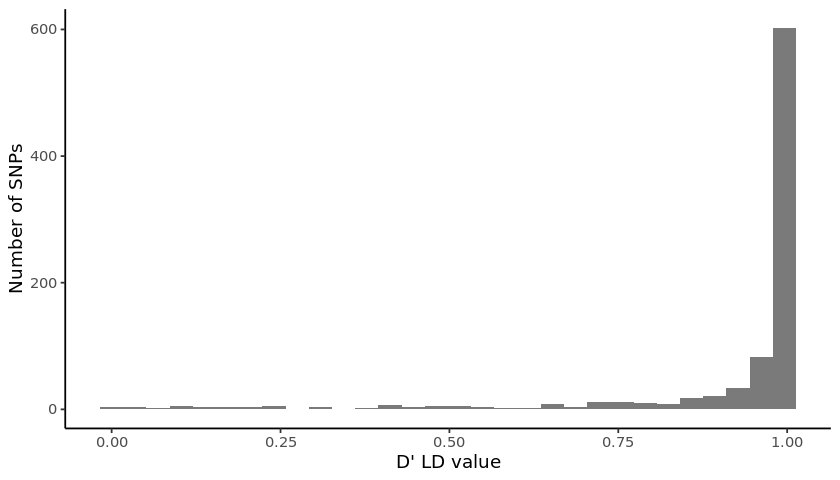

In [6]:
options(repr.plot.width = 7, repr.plot.height = 4)
p = ggplot(df, aes(x=d)) + geom_histogram(alpha = 0.8) + 
    xlab("D' LD value") + ylab("Number of SNPs") + theme_classic()
p